In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Create and train the KNN model
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
end_time = time.time()

# Predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime
print(f"Accuracy before quantization: {accuracy:.4f}")
print(f"Runtime before quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Accuracy before quantization: 0.9649
Runtime before quantization: 0.0012 seconds


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
K = 1, Training Accuracy: 1.0000, Validation Accuracy: 0.9509
K = 2, Training Accuracy: 0.9683, Validation Accuracy: 0.9614
K = 3, Training Accuracy: 0.9789, Validation Accuracy: 0.9614
K = 4, Training Accuracy: 0.9648, Validation Accuracy: 0.9579
K = 5, Training Accuracy: 0.9789, Validation Accuracy: 0.9649
K = 6, Training Accuracy: 0.9683, Validation Accuracy: 0.9614
K = 7, Training Accuracy: 0.9683, Validation Accuracy: 0.9684
K = 8, Training Accuracy: 0.9648, Validation Accuracy: 0.9649
K = 9, Training Accuracy: 0.9718, Validation Accuracy: 0.9684
K = 10, Training Accuracy: 0.9613, Validation Accuracy: 0.9649
K = 11, Training Accuracy: 0.9718, Validation Accuracy: 0.9614
K = 12, Training Accuracy: 0.9613, Validation Accuracy: 0.9614
K = 13, Training Accuracy: 0.9683, Validation Accuracy: 0.9684
K = 14, Training Accuracy: 0.9472, Validation Accuracy: 0.9579
K = 15, Training Accuracy: 0.

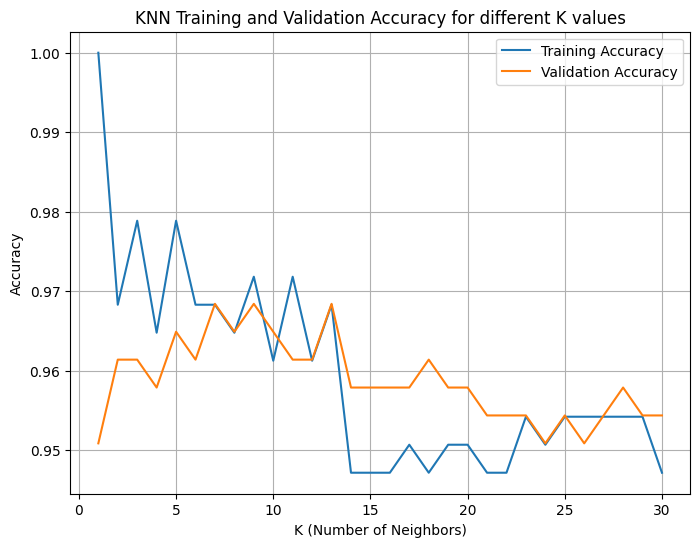

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Create lists to store training and validation accuracies for different K values
K_values = np.arange(1, 31)
training_accuracies = []
validation_accuracies = []

# Loop through K values
for K in K_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)

    # Predict labels for the training and validation sets
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_test)

    # Calculate training and validation accuracies
    training_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_test, y_val_pred)

    # Append accuracies to the lists
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

    print(f"K = {K}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the graph for training and validation accuracies
plt.figure(figsize=(8, 6))
plt.plot(K_values, training_accuracies, label='Training Accuracy')
plt.plot(K_values, validation_accuracies, label='Validation Accuracy')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Training and Validation Accuracy for different K values')
plt.legend()
plt.grid(True)
plt.show()


n_neighbors = 1, Training Accuracy: 1.0000, Validation Accuracy: 0.9509
n_neighbors = 2, Training Accuracy: 0.9683, Validation Accuracy: 0.9614
n_neighbors = 3, Training Accuracy: 0.9789, Validation Accuracy: 0.9614
n_neighbors = 4, Training Accuracy: 0.9648, Validation Accuracy: 0.9579
n_neighbors = 5, Training Accuracy: 0.9789, Validation Accuracy: 0.9649
n_neighbors = 6, Training Accuracy: 0.9683, Validation Accuracy: 0.9614
n_neighbors = 7, Training Accuracy: 0.9683, Validation Accuracy: 0.9684
n_neighbors = 8, Training Accuracy: 0.9648, Validation Accuracy: 0.9649
n_neighbors = 9, Training Accuracy: 0.9718, Validation Accuracy: 0.9684
n_neighbors = 10, Training Accuracy: 0.9613, Validation Accuracy: 0.9649
n_neighbors = 11, Training Accuracy: 0.9718, Validation Accuracy: 0.9614
n_neighbors = 12, Training Accuracy: 0.9613, Validation Accuracy: 0.9614
n_neighbors = 13, Training Accuracy: 0.9683, Validation Accuracy: 0.9684
n_neighbors = 14, Training Accuracy: 0.9472, Validation Accu

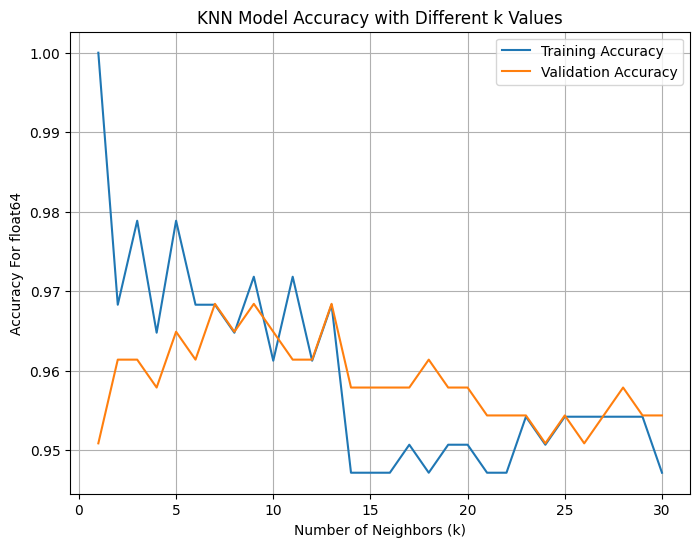

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Create lists to store training and validation accuracies for each value of n_neighbors
n_neighbors_values = np.arange(1, 31)  # Generate values from 1 to 30
training_accuracies = []
validation_accuracies = []

# Loop through n_neighbors values
for n_neighbors in n_neighbors_values:
    # Create and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Predict labels for the training and validation sets
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_test)

    # Calculate training and validation accuracies
    training_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_test, y_val_pred)

    # Append accuracies to the lists
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

    print(f"n_neighbors = {n_neighbors}, Training Accuracy: {training_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the graph for training and validation accuracies
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_values, training_accuracies, label='Training Accuracy')
plt.plot(n_neighbors_values, validation_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy For float64')
plt.title('KNN Model Accuracy with Different k Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time

# Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Apply quantization using QuantileTransformer
quantile_transformer = QuantileTransformer(n_quantiles=32, output_distribution='uniform', ignore_implicit_zeros=False, subsample=1000, random_state=None)
X_train_quantized = quantile_transformer.fit_transform(X_train)
X_test_quantized = quantile_transformer.transform(X_test)

# Convert the quantized data to float32
X_train_quantized = X_train_quantized.astype(np.int32)
X_test_quantized = X_test_quantized.astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size_train = X_train_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (training set): {quantized_bit_size_train} bits")

quantized_bit_size_test = X_test_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (test set): {quantized_bit_size_test} bits")

# Create and train the KNN model on the quantized training set
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_quantized, y_train)
end_time = time.time()

# Predict labels for the quantized test set
y_pred_quantized = knn.predict(X_test_quantized)

# Calculate the accuracy of the model on the quantized test set
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime after quantization
print(f"Accuracy after quantization: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Bit size of the quantized data (training set): 32 bits
Bit size of the quantized data (test set): 32 bits
Accuracy after quantization: 0.6702
Runtime after quantization: 0.0010 seconds


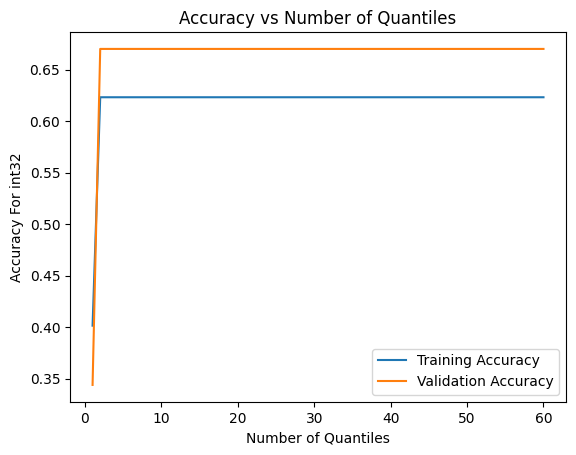

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import time
import matplotlib.pyplot as plt

# Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Define the range of quantiles
quantile_range = range(1, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
quantile_list = []

for n_quantiles in quantile_range:
    # Apply quantization using QuantileTransformer
    quantile_transformer = QuantileTransformer(n_quantiles=n_quantiles, output_distribution='uniform',
                                               ignore_implicit_zeros=False, subsample=1000, random_state=None)
    X_train_quantized = quantile_transformer.fit_transform(X_train)
    X_test_quantized = quantile_transformer.transform(X_test)

    # Convert the quantized data to float32
    X_train_quantized = X_train_quantized.astype(np.int32)
    X_test_quantized = X_test_quantized.astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and quantile values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    quantile_list.append(n_quantiles)

# Plot the graph
plt.plot(quantile_list, train_accuracy_list, label='Training Accuracy')
plt.plot(quantile_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Quantiles")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Apply quantization using numpy.round
X_train_quantized = np.round(X_train, decimals=4, out=None).astype(np.int32)
X_test_quantized = np.round(X_test, decimals=4, out=None).astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size_train = X_train_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (training set): {quantized_bit_size_train} bits")

quantized_bit_size_test = X_test_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (test set): {quantized_bit_size_test} bits")

# Create and train the KNN model on the quantized training set
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_quantized, y_train)
end_time = time.time()

# Predict labels for the quantized test set
y_pred_quantized = knn.predict(X_test_quantized)

# Calculate the accuracy of the model on the quantized test set
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime after quantization
print(f"Accuracy after quantization: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Bit size of the quantized data (training set): 32 bits
Bit size of the quantized data (test set): 32 bits
Accuracy after quantization: 0.8816
Runtime after quantization: 0.0010 seconds


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits


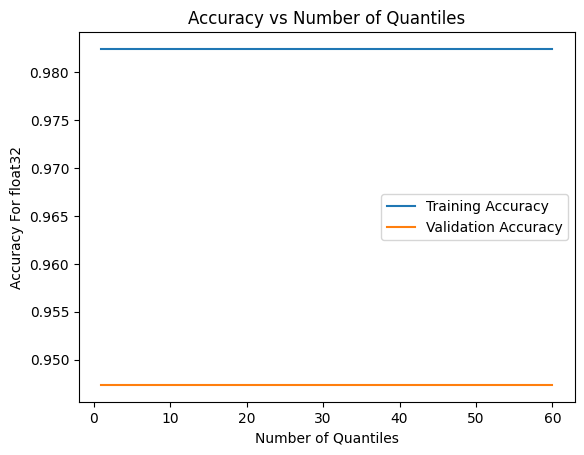

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

#Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Define the range of decimals (number of quantiles)
decimal_range = range(1, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
decimal_list = []

for decimals in decimal_range:
    # Apply quantization using np.round
    X_train_quantized = np.round(X_train, decimals=decimals).astype(np.float32)
    X_test_quantized = np.round(X_test, decimals=decimals).astype(np.float32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and decimal values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    decimal_list.append(decimals)

# Plot the graph
plt.plot(decimal_list, train_accuracy_list, label='Training Accuracy')
plt.plot(decimal_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Quantiles")
plt.ylabel("Accuracy For float32")
plt.title("Accuracy vs Number of Quantiles")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time

#Load the dataset
data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=23)

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Apply quantization using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=32, encode='ordinal', strategy='uniform', dtype=None, subsample=None, random_state=None)
X_train_quantized = discretizer.fit_transform(X_train)
X_test_quantized = discretizer.transform(X_test)

# Convert the quantized data to float32
X_train_quantized = X_train_quantized.astype(np.int32)
X_test_quantized = X_test_quantized.astype(np.int32)

# Print the bit size of the quantized data
quantized_bit_size_train = X_train_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (training set): {quantized_bit_size_train} bits")

quantized_bit_size_test = X_test_quantized.dtype.itemsize * 8
print(f"Bit size of the quantized data (test set): {quantized_bit_size_test} bits")

# Create and train the KNN model on the quantized training set
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train_quantized, y_train)
end_time = time.time()

# Predict labels for the quantized test set
y_pred_quantized = knn.predict(X_test_quantized)

# Calculate the accuracy of the model on the quantized test set
accuracy_quantized = accuracy_score(y_test, y_pred_quantized)

# Calculate the runtime
runtime = end_time - start_time

# Print the accuracy and runtime after quantization
print(f"Accuracy after quantization: {accuracy_quantized:.4f}")
print(f"Runtime after quantization: {runtime:.4f} seconds")


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits
Bit size of the quantized data (training set): 32 bits
Bit size of the quantized data (test set): 32 bits
Accuracy after quantization: 0.9499
Runtime after quantization: 0.0010 seconds


Bit size of the input data (training set): 64 bits
Bit size of the input data (test set): 64 bits


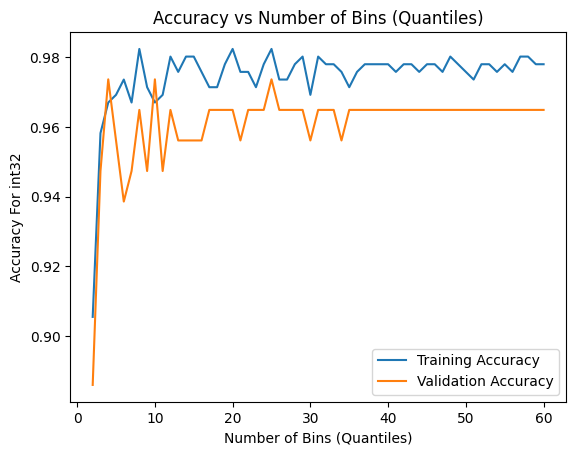

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import matplotlib.pyplot as plt

data_url = "https://drive.google.com/uc?id=1-Cl3x-a7kAAfNooyDEZLNp-Xly50WxeO"
df = pd.read_csv(data_url)

# Split the data into features (X) and labels (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Apply feature scaling to the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the bit size of the input data
bit_size_train = X_scaled.dtype.itemsize * 8
print(f"Bit size of the input data (training set): {bit_size_train} bits")

# Print the bit size of the test set
bit_size_test = X_test.dtype.itemsize * 8
print(f"Bit size of the input data (test set): {bit_size_test} bits")

# Define the range of bins (number of quantiles)
bin_range = range(2, 61)

# Lists to store training and validation accuracy
train_accuracy_list = []
val_accuracy_list = []
bin_list = []

for n_bins in bin_range:
    # Apply quantization using KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    X_train_quantized = discretizer.fit_transform(X_train)
    X_test_quantized = discretizer.transform(X_test)

    # Convert the quantized data to int32
    X_train_quantized = X_train_quantized.astype(np.int32)
    X_test_quantized = X_test_quantized.astype(np.int32)

    # Create and train the KNN model on the quantized training set
    knn = KNeighborsClassifier()
    knn.fit(X_train_quantized, y_train)

    # Predict labels for the quantized training and validation sets
    y_pred_train = knn.predict(X_train_quantized)
    y_pred_val = knn.predict(X_test_quantized)

    # Calculate the accuracy of the model on the quantized training and validation sets
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred_val)

    # Append accuracy and bin values to the lists
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    bin_list.append(n_bins)

# Plot the graph
plt.plot(bin_list, train_accuracy_list, label='Training Accuracy')
plt.plot(bin_list, val_accuracy_list, label='Validation Accuracy')
plt.xlabel("Number of Bins (Quantiles)")
plt.ylabel("Accuracy For int32")
plt.title("Accuracy vs Number of Bins (Quantiles)")
plt.legend()
plt.show()
